### Assignment 01
### Index No: 190072E
### Name: E.M.D.A. Bandara

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

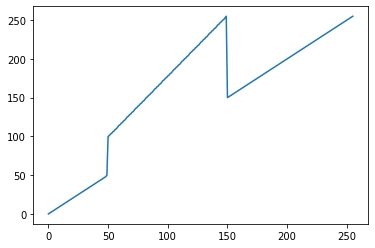

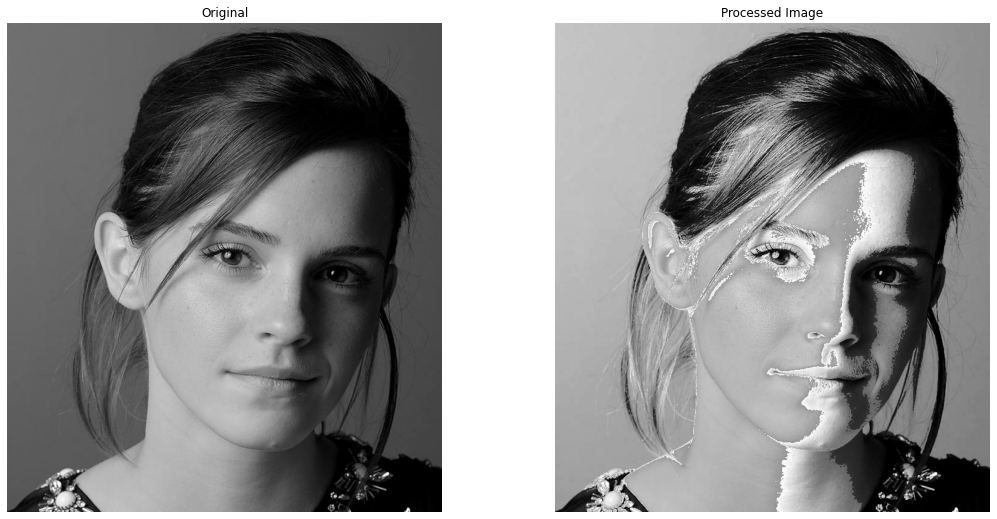

In [80]:
#Quesntion 01
img = cv.imread('images/emma_gray.jpg')
assert img is not None

t_1 = np.linspace(0, 50, 50, endpoint= True)
t_2 = np.linspace(100, 255, 100, endpoint= True)
t_3 = np.linspace(150, 255, 106, endpoint= True)

index = np.linspace(0, 255, 256, endpoint= True).astype(np.uint8)
t = np.concatenate((t_1, t_2, t_3), axis = 0).astype(np.uint8)

plt.plot(index, t)

assert len(index) == 256
assert len(t) == 256

transformed_img = cv.LUT(img, t)

fig, ax = plt.subplots( 1, 2, figsize = (18, 9))
ax[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original')
ax[1].imshow(transformed_img, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Processed Image')

for i in range(2):
    ax[i].axis('off')
plt.show()


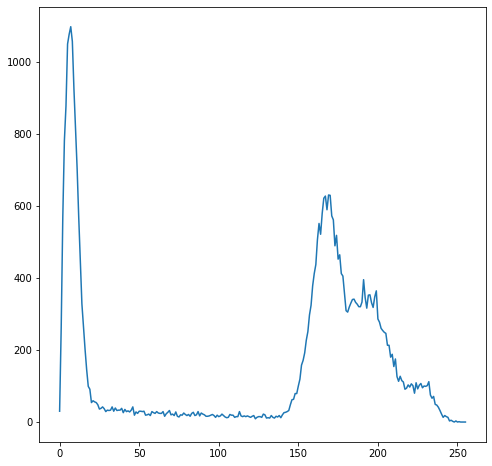

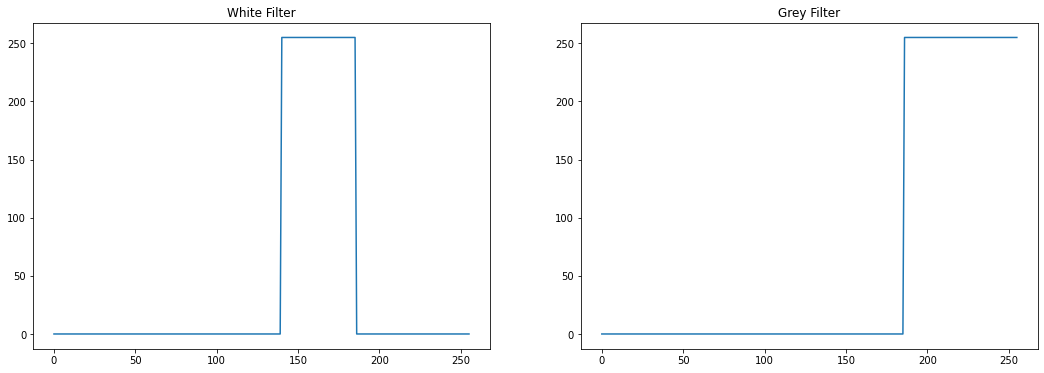

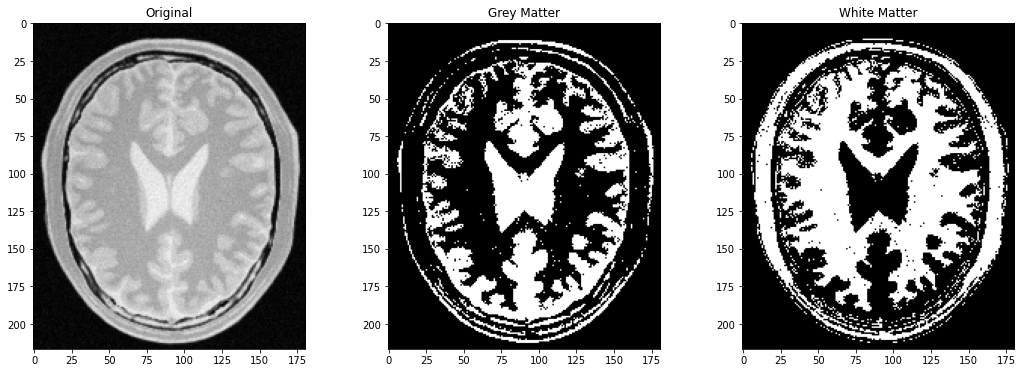

In [79]:
#Question 02
img = cv.imread('images/brain_proton_density_slice.png')
assert img is not None

hist_f = cv.calcHist([img], [0], None, [256], [0,256])
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(hist_f)

fig, ax = plt.subplots( 1, 2, figsize = (18, 6))
index = np.linspace(0, 255, 256, endpoint= True).astype(np.uint8)

grey_1 = np.linspace(0, 0, 186, endpoint= True)
grey_2 = np.linspace(255, 255, 70, endpoint= True)
grey = np.concatenate((grey_1, grey_2), axis = 0).astype(np.uint8)

white_1 = np.linspace(0, 0, 140, endpoint= True)
white_2 = np.linspace(255, 255, 46, endpoint= True)
white_3 = np.linspace(0, 0, 70, endpoint= True)
white = np.concatenate((white_1, white_2, white_3), axis = 0).astype(np.uint8)

grey_matter  = cv.LUT(img, grey)
white_matter = cv.LUT(img, white)
# white_matter = cv.LUT()
ax[0].plot(index, white)
ax[0].set_title('White Filter')
ax[1].plot(index, grey)
ax[1].set_title('Grey Filter')

fig, ax = plt.subplots( 1, 3, figsize = (18, 6))
ax[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original')
ax[1].imshow(grey_matter, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Grey Matter')
ax[2].imshow(white_matter, cmap = 'gray', vmin = 0, vmax = 255)
ax[2].set_title('White Matter')

plt.show()

for i in range(3):
    ax[i].axis('off')
plt.show()

[[  7 126 130]
 [  7 126 130]
 [ 12 126 130]
 ...
 [ 18 128 132]
 [ 23 126 134]
 [ 26 126 135]]
(480, 720, 3)
(480, 720)


Text(0.5, 1.0, 'Gamma Corrected')

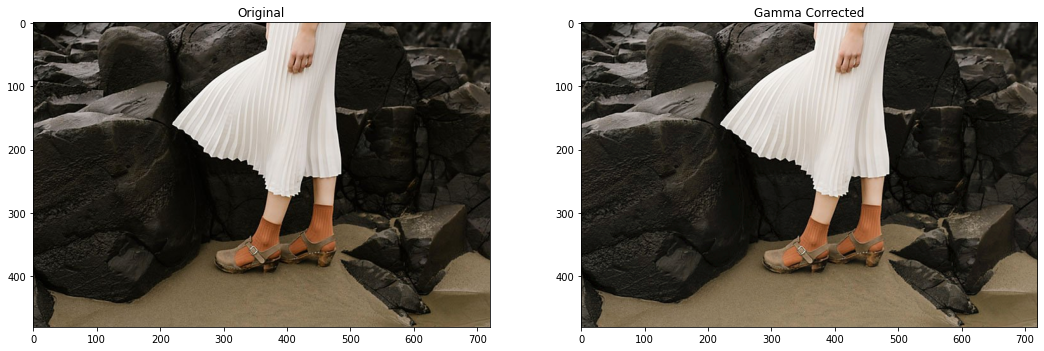

In [103]:
#Question 03
img = cv.imread('images/highlights_and_shadows.jpg')
assert img is not None

lab_img = cv.cvtColor(img, cv.COLOR_BGR2LAB)

gamma = 1/1.14

t = np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
print(lab_img[0, :, :])
lab_img[:, :, 0] = cv.LUT(lab_img[:, :, 0],t)

print(lab_img.shape)

print(lab_img[:, :, 0].shape)

gamma_img = cv.cvtColor(lab_img, cv.COLOR_Lab2RGB)


fig, ax = plt.subplots(1, 2, figsize = (18, 6))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[1].imshow(gamma_img)
ax[1].set_title('Gamma Corrected')



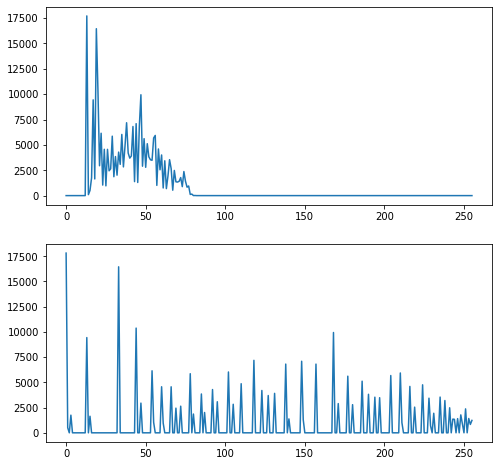

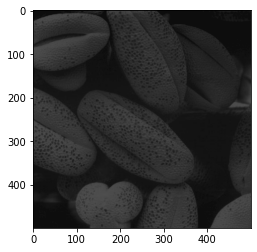

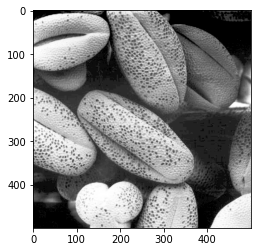

In [56]:
#Question 04
f = cv.imread('images/shells.png' , cv.IMREAD_GRAYSCALE)
assert img is not None

hist_f = cv.calcHist([f], [0], None, [256], [0,256])
g = cv.equalizeHist(f)
hist_g = cv.calcHist([g], [0], None, [256], [0,256])

fig, ax = plt.subplots(2, 1, figsize=(8,8))

ax[0].plot(hist_f)
ax[1].plot(hist_g)

fig, ax = plt.subplots(1, 1)
plt.imshow(cv.cvtColor(f, cv.COLOR_BGR2RGB))

fig, ax = plt.subplots(1, 1)
plt.imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))

In [52]:
#Question 05

In [53]:
#Question 06

In [ ]:
#Question 07